<a href="https://colab.research.google.com/github/gilesitorr/Taller_de_Investigacion/blob/main/Actividad_1/GR_actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 1
## Taller de Investigación (Relatividad General)
#### Impartido por Dr. José Luis López Picón
##### Gil Estéfano Rodríguez Rivera

Este trabajo tiene como objetivo comparar los resultados _calculados a mano_ de los símbolos de Christoffel (que se encuentran en el reporte de la tarea). Luego, se realizarán los cálculos de las componentes del tensor de Ricci y el cálculo del escalar de Ricci. El objetivo final es calcular el tensor de Einstein asociado a la métrica con la que se trabaja.

Para saber más sobre la librería, aquí está el enlace a [EinsteinPy](https://docs.einsteinpy.org/en/stable/index.html).

## Librerías

In [23]:
# Se descarga el paquete EinsteinPy
!pip install einsteinpy

In [24]:
# Para poder realizar cálculos simbólicos
import sympy

# Se importan algunas funciones conocidas así como las necesarias para definir
# las variables y las funciones desconocidas a estudiar
from sympy import symbols, sin, cos, exp, Function

# Se importan de EinsteinPy los tensores y objetos que se calcularán
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, RicciTensor, RicciScalar, EinsteinTensor

# Esto se hace para poder tener un formato de impresión de tensores "bonito"
sympy.init_printing()

## Cálculos

Antes de realizar los cálculos, se deben definir las variables a utilizar y la métrica con la que se trabajará

In [25]:
# Se definen las variables a usar
syms = symbols("t r theta phi")
t, r, th, ph = syms

# Se definen las funciones a usar que dependen de r
lam = Function("lambda")(r)
nu = Function("nu")(r)

In [26]:
# Se construye la métrica diagonal
g = sympy.diag(-exp(-2*lam), exp(2*nu), r ** 2, r ** 2 * sin(th) ** 2).tolist()
metrica = MetricTensor(g, syms)

In [27]:
# El tensor métrico en forma de matriz
metrica.tensor()

⎡  -2⋅λ(r)                         ⎤
⎢-ℯ            0     0       0     ⎥
⎢                                  ⎥
⎢            2⋅ν(r)                ⎥
⎢    0      ℯ        0       0     ⎥
⎢                                  ⎥
⎢                     2            ⎥
⎢    0         0     r       0     ⎥
⎢                                  ⎥
⎢                         2    2   ⎥
⎣    0         0     0   r ⋅sin (θ)⎦

### Símbolos de Christoffel

El primer paso en el cálculo del tensor de Einstein son los símbolos de Christoffel

In [28]:
# Se calculan los símbolos de Christoffel a partir de la métrica
christoffel = ChristoffelSymbols.from_metric(metrica)

In [29]:
# Los símbolos de Christoffel que tienen índice t arriba
christoffel.tensor()[0]

⎡            d             ⎤
⎢    0      -──(λ(r))  0  0⎥
⎢            dr            ⎥
⎢                          ⎥
⎢ d                        ⎥
⎢-──(λ(r))      0      0  0⎥
⎢ dr                       ⎥
⎢                          ⎥
⎢    0          0      0  0⎥
⎢                          ⎥
⎣    0          0      0  0⎦

In [30]:
# Los símbolos de Christoffel que tienen índice r arriba
christoffel.tensor()[1]

⎡  -2⋅λ(r)  -2⋅ν(r) d                                                   ⎤
⎢-ℯ       ⋅ℯ       ⋅──(λ(r))     0           0                0         ⎥
⎢                   dr                                                  ⎥
⎢                                                                       ⎥
⎢                             d                                         ⎥
⎢             0               ──(ν(r))       0                0         ⎥
⎢                             dr                                        ⎥
⎢                                                                       ⎥
⎢                                           -2⋅ν(r)                     ⎥
⎢             0                  0      -r⋅ℯ                  0         ⎥
⎢                                                                       ⎥
⎢                                                        -2⋅ν(r)    2   ⎥
⎣             0                  0           0       -r⋅ℯ       ⋅sin (θ)⎦

In [31]:
# Los símbolos de Christoffel que tienen índice theta arriba
christoffel.tensor()[2]

⎡0  0  0        0       ⎤
⎢                       ⎥
⎢      1                ⎥
⎢0  0  ─        0       ⎥
⎢      r                ⎥
⎢                       ⎥
⎢   1                   ⎥
⎢0  ─  0        0       ⎥
⎢   r                   ⎥
⎢                       ⎥
⎣0  0  0  -sin(θ)⋅cos(θ)⎦

In [32]:
# Los símbolos de Christoffel que tienen índice phi arriba
christoffel.tensor()[3]

⎡0  0    0       0   ⎤
⎢                    ⎥
⎢                1   ⎥
⎢0  0    0       ─   ⎥
⎢                r   ⎥
⎢                    ⎥
⎢              cos(θ)⎥
⎢0  0    0     ──────⎥
⎢              sin(θ)⎥
⎢                    ⎥
⎢   1  cos(θ)        ⎥
⎢0  ─  ──────    0   ⎥
⎣   r  sin(θ)        ⎦

### Tensor de Ricci

A partir de los símbolos de Christoffel, se construye el tensor de Ricci.

In [33]:
# Se calcula el tensor de Ricci a partir de los símbolos de Christoffel
ricci_tensor = RicciTensor.from_christoffels(christoffel)

In [34]:
# Se muestra el tensor de Ricci en forma de matriz
ricci_tensor.tensor()

⎡⎛  ⎛          2                         2      ⎞             ⎞               
⎢⎜  ⎜⎛d       ⎞    d        d           d       ⎟     d       ⎟  -2⋅λ(r) - 2⋅ν
⎢⎜r⋅⎜⎜──(λ(r))⎟  + ──(λ(r))⋅──(ν(r)) - ───(λ(r))⎟ - 2⋅──(λ(r))⎟⋅ℯ             
⎢⎜  ⎜⎝dr      ⎠    dr       dr           2      ⎟     dr      ⎟               
⎢⎝  ⎝                                  dr       ⎠             ⎠               
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                       r                                     
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                       0                                     
⎢                                                   

### Escalar de Ricci

Una vez que se tiene el tensor de Ricci, se contraen sus índices y se obtiene el escalar de curvatura de Ricci.

In [35]:
# Se calcula el escalar de Ricci
ricci_escalar = RicciScalar.from_riccitensor(ricci_tensor)

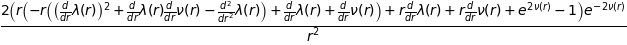

In [36]:
# Se muestra el escalar con un formato apropiado para su visualización
ricci_escalar.expr

Con estos resultados ya se puede calcular el tensor de Einstein. Sin embargo, también se puede calcular ese tensor directamente, a partir de la métrica.

### Tensor de Einstein

Si no importa tanto el procedimiento para calcular el tensor de Einstein, también se puede calcular directamente de la métrica.

In [37]:
# Se calcula el tensor de Einstein
einstein = EinsteinTensor.from_metric(metrica)

In [38]:
# Se simplifican las expresiones del tensor y se muestra
einstein.simplify()

⎡⎛      d               2⋅ν(r)      ⎞  -2⋅λ(r) - 2⋅ν(r)                       
⎢⎜2.0⋅r⋅──(ν(r)) + 1.0⋅ℯ       - 1.0⎟⋅ℯ                                       
⎢⎝      dr                          ⎠                                         
⎢──────────────────────────────────────────────────────                    0  
⎢                           2                                                 
⎢                          r                                                  
⎢                                                                             
⎢                                                            ⎛        d       
⎢                                                        1.0⋅⎜- 2.0⋅r⋅──(λ(r))
⎢                                                            ⎝        dr      
⎢                          0                             ─────────────────────
⎢                                                                           2 
⎢                                                   